# How much does proximity to Microsoft/Amazon HQ matter?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('../')

In [3]:
df = pd.read_csv("data/king_county_data_clean.csv").drop('Unnamed: 0', axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
### Adding in the coordinates for Amazon and Microsoft HQ
amazon_coordinates = ( 47.623211, -122.337158)
microsoft_coordinates = (47.642440, -122.137030)
center = np.array(((amazon_coordinates[0]+microsoft_coordinates[0])/2 , (amazon_coordinates[1]+microsoft_coordinates[1])/2))
center

array([  47.6328255, -122.237094 ])

In [6]:
df['distance_frm_center'] = (df['lat']-center[0])**2 + (df['long']-center[1])**2

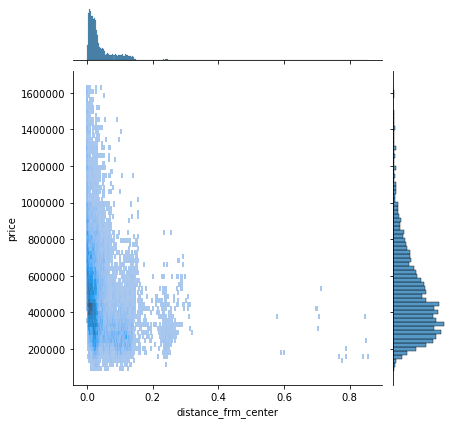

In [7]:
sns.jointplot(x='distance_frm_center', y='price', data=df, kind='hist')

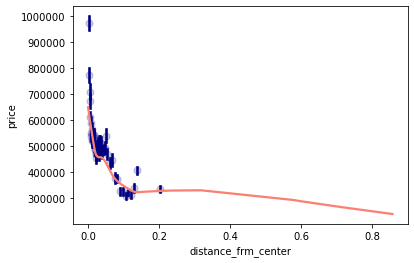

In [32]:
sns.regplot(x=df['distance_frm_center'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

In [8]:
df['log_dist_frm_center'] = df['distance_frm_center'].map(lambda x: np.log(x))

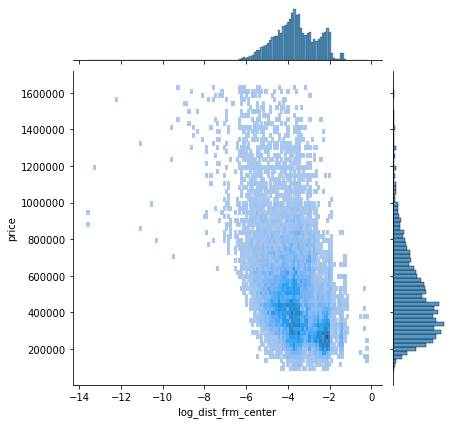

In [9]:
sns.jointplot(x='log_dist_frm_center', y='price', data=df, kind='hist')

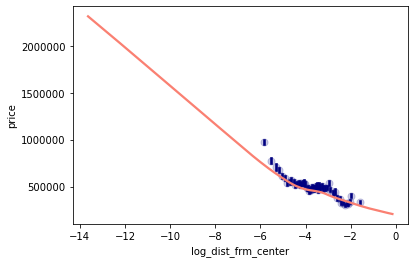

In [35]:
sns.regplot(x=df['log_dist_frm_center'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

## There is some form of relationship between the distance from the center and price. We see that the most expensive houses tend to be located closer to this center point. This can be attributed to many different factors; there is more than one reason for wanting to be in downtown Seattle. More information is needed, and it would be greatly to our advantage if we had data of this county for more than just 2015. It would be interesting to see what the effect of each of Microsoft and Amazon on the housing market and population density in the years that they established themselves in the city and the years that followed.

In [10]:
import folium

In [18]:
list(center)

[47.632825499999996, -122.237094]

In [56]:
m = folium.Map(location=center, zoom_start=10)
m

In [65]:
#Markers for space of data
northmost_house = list(df[df['lat']==max(df['lat'])][['lat','long']].reset_index().drop(columns='index').loc[0])
southmost_house = list(df[df['lat']==min(df['lat'])][['lat','long']].reset_index().drop(columns='index').loc[0])
westmost_house = list(df[df['long']==min(df['long'])][['lat','long']].reset_index().drop(columns='index').loc[0])
eastmost_house = list(df[df['long']==max(df['long'])][['lat','long']].reset_index().drop(columns='index').loc[0])

folium.Marker(location=northmost_house ,popup="Northernmost House" ,icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=southmost_house ,popup="Southernmost House" ,icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=westmost_house ,popup="Westernmost House" ,icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=eastmost_house ,popup="Easternmost House" ,icon=folium.Icon(color='green')).add_to(m)

#Markers for the HQs
folium.Marker(location=microsoft_coordinates ,popup='Microsoft HQ Location' ,icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=amazon_coordinates ,popup= 'Amazon HQ Location',icon=folium.Icon(color='red')).add_to(m)

#Marker for center
folium.Marker(location=center ,popup="Centerpoint Between HQs" ,icon=folium.Icon(color='blue')).add_to(m)

In [66]:
m

## There is a large area covered by our data, and we can see now why some of the data is considered to be very far out. however, looking at the graph of the distance, we know that the majority of houses sold are actually fairly close to this point on our map.